In [8]:
# import helper class
from utils import SPARKDataset , PyTorchSPARKDataset
from matplotlib import pyplot as plt
from random import randint 


In [12]:
dataset_root_dir = "/Users/mohamedadel/Desktop/Data/Notebooks/"
split = "val"

class_map= {'VenusExpress':0, 'Cheops':1, 'LisaPathfinder':2, 'ObservationSat1':3, 'Proba2':4, 'Proba3':5,
                           'Proba3ocs' :6, 'Smart1':7, 'Soho':8, 'XMM Newton':9} # Class map

dataset = SPARKDataset(class_map, root_dir=dataset_root_dir,split=split) 

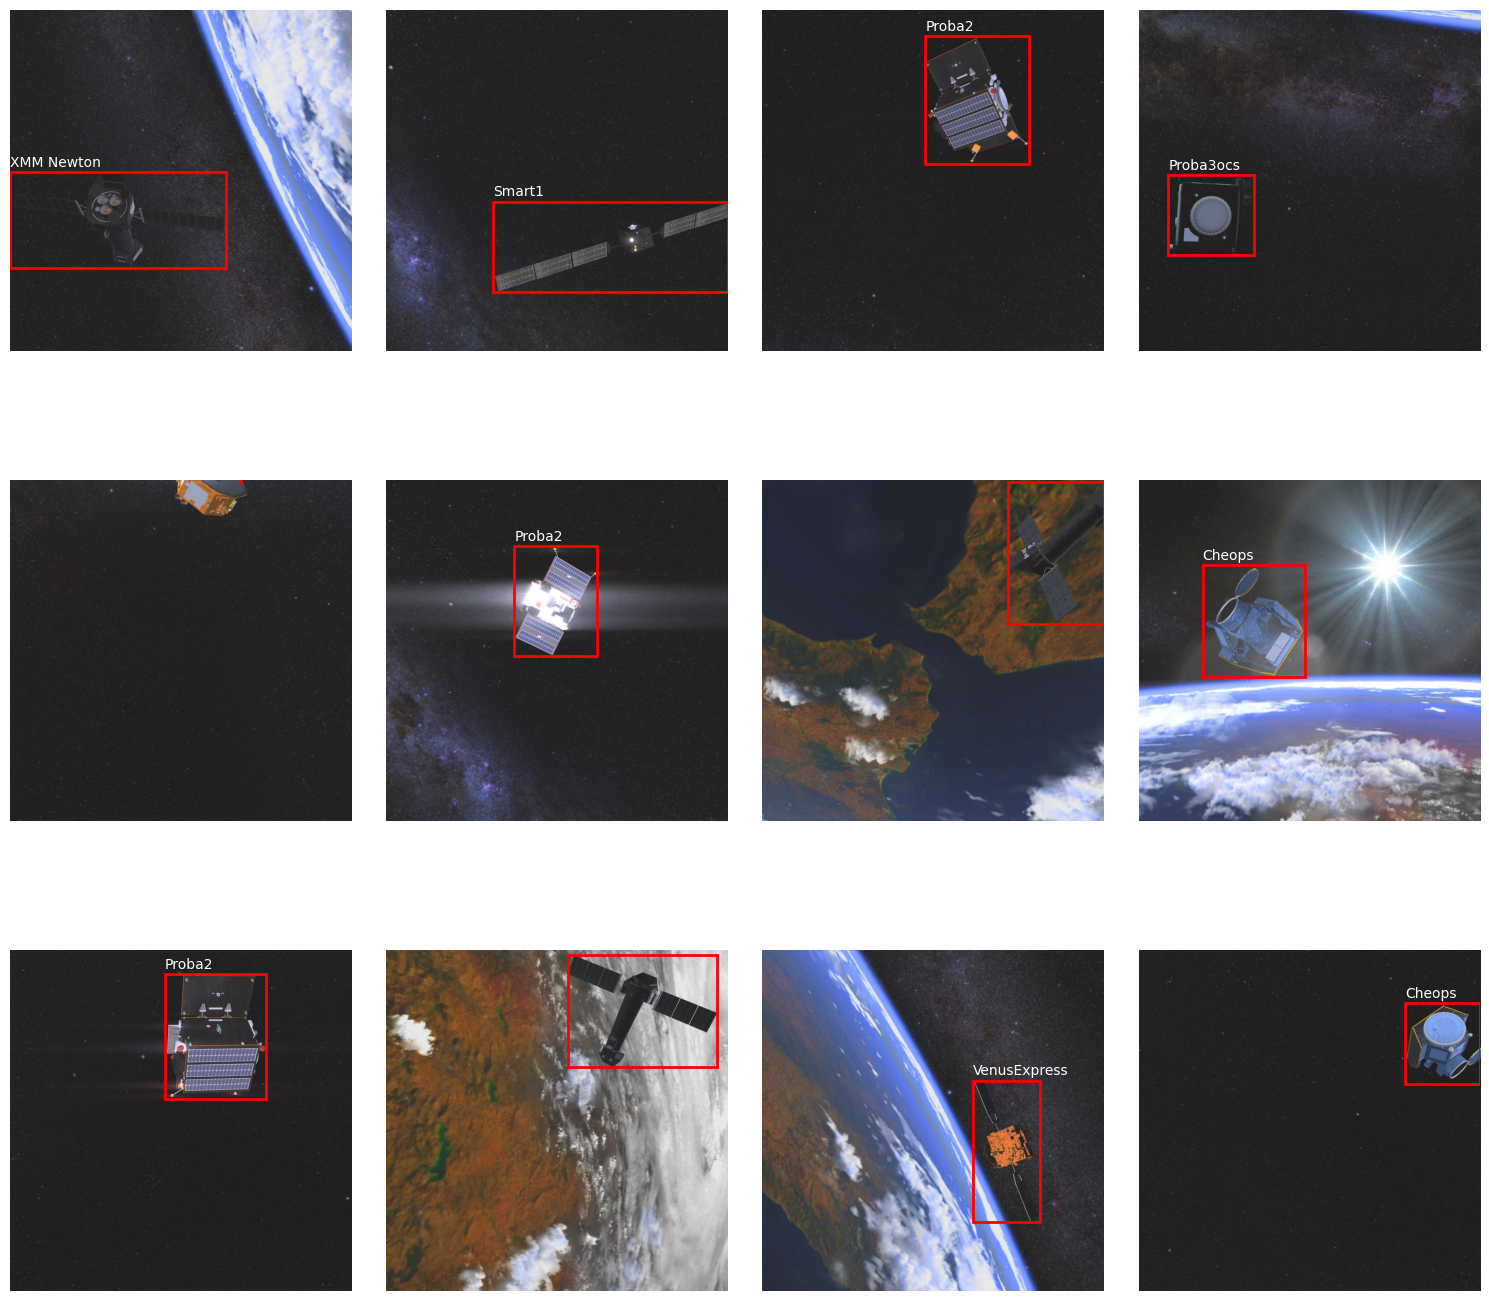

In [15]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, 6000),size = (10,10),ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout() 

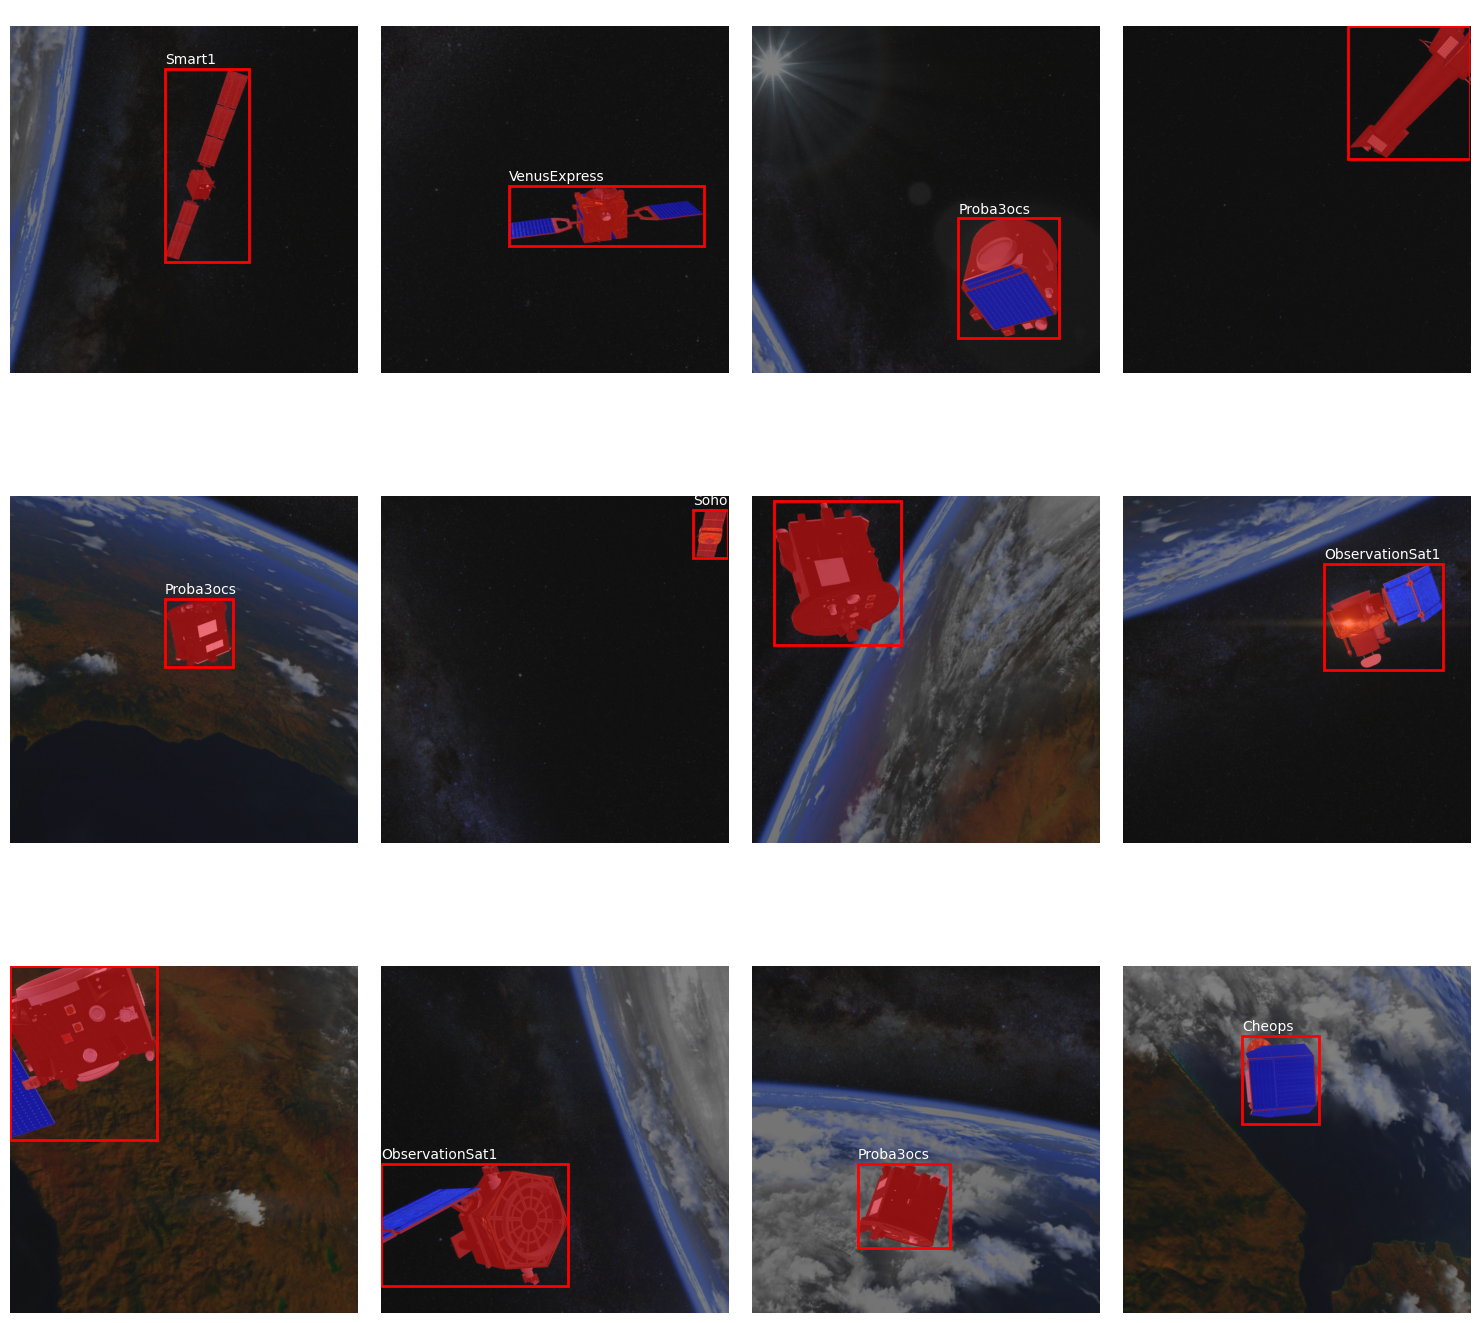

In [14]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, 6000),size = (10,10),ax=axes[i][j],mask_visualize=True)
        axes[i][j].axis('off')
fig.tight_layout() 

In [16]:
torch_dataset = PyTorchSPARKDataset(class_map, root_dir=dataset_root_dir,split=split) 

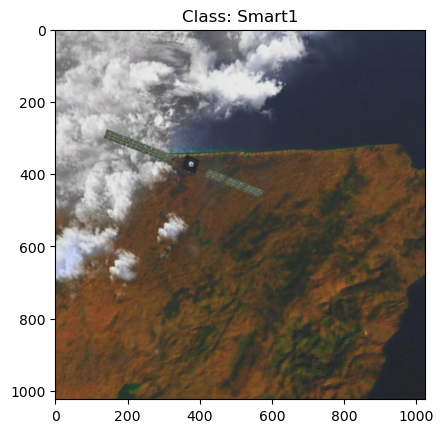

In [17]:
sample_idx = 0  # Index of the sample you want to retrieve
sample = torch_dataset[sample_idx]

# Now you can access the image, mask, bbox, and class from the sample
image = sample['img']
mask = sample['mask']
bbox = sample['bbox']
class_label = sample['class']

# If you want to display the image, you can use matplotlib, but remember to convert it back to a PIL image or a NumPy array
import matplotlib.pyplot as plt
import numpy as np

# Convert the tensor image to a NumPy array and display it
# Note: PyTorch tensors are in CxHxW format and need to be converted to HxWxC for matplotlib
reverse_class_map = {v: k for k, v in class_map.items()}

# Use the class label to get the corresponding class name
class_name = reverse_class_map[class_label.item()]


image_np = image.numpy().transpose((1, 2, 0))
plt.imshow(image_np)
plt.title(f'Class: {class_name}')
plt.show()


In [18]:
import torch

train_loader = torch.utils.data.DataLoader(torch_dataset, batch_size=10,drop_last=True)

for i,batch in enumerate(train_loader):
    print(f"image shape {batch['img'].shape},labels shape {batch['class'].shape} , bounding box shape {batch['bbox'].shape}  ")

    if i == 3:
        break 

image shape torch.Size([10, 3, 1024, 1024]),labels shape torch.Size([10]) , bounding box shape torch.Size([10, 4])  
image shape torch.Size([10, 3, 1024, 1024]),labels shape torch.Size([10]) , bounding box shape torch.Size([10, 4])  
image shape torch.Size([10, 3, 1024, 1024]),labels shape torch.Size([10]) , bounding box shape torch.Size([10, 4])  
image shape torch.Size([10, 3, 1024, 1024]),labels shape torch.Size([10]) , bounding box shape torch.Size([10, 4])  
